# Our current tool box

- For given a **first order system**, time-invarient system and regardless of complexity, we can:
    - Use **Flow** to analyze system behaviors
    - Use **simulations** to estimate our state variable's change over time for fixed initial condition and parameters
    - Apply **bifurcation analysis** to determine the impact of changing a parameter on the system behaviors
    - **Linearize** the system, though typically unnecessary for first order systems
- For given a **second order system**, time-invarient system and regardless of complexity, we can:
    - Use **phase portraits** to analyze system behaviors
    - Use **simulations** to estimate our state variables' change over time for fixed initial condition and parameters
    - Use **eigenvalues** to determine stability of steadystates


# How to use visual approaches to larger, nth order systems

- Visualization approaches are critical to understanding ODE dynamics
- While phase portraits cannot be extended to 4th order ODE systems, other concepts can
- Eigenvalues can be applied to nth order systems. The challange becomes
    - identifying all of the steadystates that may exist (never trivial)
    - calculating the Jacobian, which grows with dimensions
        - Jacobian is always n x n
        - Likely tool exists to approximate the Jacobian for us (scipy.optimize.approx_fprime)
- Bifurcation analysis can also be applied in a limited sense
    - For larger systems, one selects a state and parameter of interest and generates a bifurcation plot
    - Danger is that other states not illustrated in the plot may be doing nonphysical things

# Show Chemostat Paper 2003

Shoemaker J, Reeves GT, Gupta S, Pilyugin SS, Egli T, Narang A. The dynamics of single-substrate continuous cultures: the role of transport enzymes. J Theor Biol. 2003 Jun 7;222(3):307-22. doi: 10.1016/s0022-5193(03)00036-5. PubMed PMID: 12732477.

# To date, we have relied on simulators - but we don't know how simulators work!!

- It is important to understand what simulators can and cannot do
- Concepts we will cover:
    - implicit vs explicit simulator strategies
    - stiffness: when certain simulators take a long time to complete a simulation because they require small step sizes
    - stability and simulations

# A reminder: Simulators are not perfect

In the space below, write the code to simulate solutions to the following:
1. $\dot{y} = -y^2+y-\frac{1}{t+1}$
2. $\dot{y} = -y^2-y+\frac{1}{t+1}$

Use the initial condition of y0=1 for both functions and plot the results from time = [0,21]

After plotting, solve the solution to (1) above by hand.

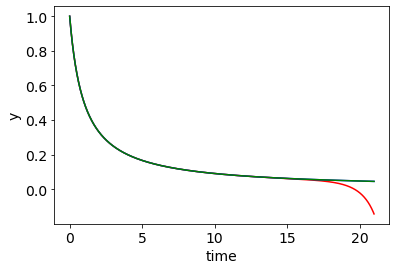

In [1]:
#@title
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

# Define a function which calculates the derivative
def f1(y,t):
    return -y**2+y-(1/(t+1));

def f2(y,t):
    return -y**2-y+(1/(t+1));

timesteps = np.linspace(0,21,10000)
y0 = 1.0  # the initial condition
y1 = odeint(f1, y0, timesteps)
y2 = odeint(f2, y0, timesteps)

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("y")
plt.plot(timesteps, y1,'r');
plt.plot(timesteps, y2,'b');

# Double check answer
plt.plot(timesteps,1/(1+timesteps),'g')

# A reminder: Simulators are not perfect

- The solutions to these two simulations should be **100% the same**
    - In other words, these are the same equations, just written in different ways
- Obviously, the solutions from our simulator do not match
- And, yes, these can be solved by hand, are stable and should approach a steadystate value of 0 as time goes to infinite.
- **So why did the simulator fail?**

# A reminder: Simulators are not perfect; Example 2

In the space below, write the code to simulate solutions to the following:
1. $\dot{y} = y-sin(t)-cos(t)$
2. $\dot{y} = -y-sin(t)+cos(t)$

Use the initial condition of y0=1 for both functions and plot the results from time = [0,20]

After plotting, solve the solution to (1) above by hand.

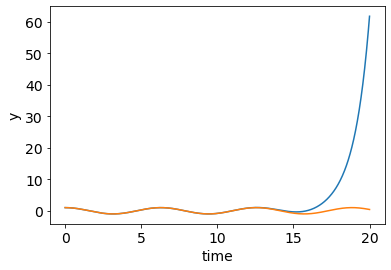

In [2]:
#@title
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

# Define a function which calculates the derivative
def f1(y,t):
    return y-math.sin(t)-math.cos(t)

def f2(y,t):
    return -y-math.sin(t)+math.cos(t)

timesteps = np.linspace(0,20,1000)
y0 = 1.0  # the initial condition
y1 = odeint(f1, y0, timesteps)
y2 = odeint(f2, y0, timesteps)

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("y")
plt.plot(timesteps, y1);
plt.plot(timesteps, y2);

# So how do ODE simulators work?

- All simulators work on the same basic premise
    - We take time, break it into tiny pieces, and then use the value of the derivatives to estimate the state values at other times.
- For now, we will continue working with initial value problems (IVP), meaning we start at some point and move forward or backward in time or space. IVP only require values specified at one point.
- Later problems will be boundary value problems, which require more than 1 piece of information

# So how do ODE simulators work?

1. We start at some initial value and some point in time. Usually we just let time = 0.
2. We know the derivative defines how much the solution changes for an infinitesimally small change in time.
3. Simulators say let's take a very small step in time, and use the derivative to estimate how much the solution has changed.
4. Two broad classes of simulators exist (with combinations of both being used):
    1. Explicit solvers
    2. Implicit solvers

# Explicit Solvers: Forward Euler Method
- First method proposed to estimate solutions to ODEs
    - You have probably learned this before or done this by hand
- Approach
    1. Given $\frac{dy}{dt} = f(y,t)$
    2. Start at t = 0 and some initial conditions $y_0$
    3. Define h to be our stepsize in time and plan to take N steps in time
    4. Euler method is simply:
        $y_{n+1} = y_n+h*f(y_n,t_n)$ where n is a step forward in time, going from 0 to N.
- Let's code a Euler approach for the following:
\begin{align}
\dot{x} = -x - y \\
\dot{y} = x - y\\
\end{align}

with x = 3 and y = 5 as the initial conditions.
        

In [3]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline


# Define our derivative
def f(v,t):
    x, y = v;
    return np.array([-x-y,x-y])

# define step size
h = .1;
n_steps = 100;

# define our initial conditions.
time = np.zeros(n_steps);
output = np.zeros((n_steps,2));
output[0] = [3,5];

# Write a loop here to perform a forward euler solution. After the loop, plot the results.

# Implicit ODE solvers: Backward Euler

- In explicit solvers, out estimates of the state value at the **next time** point only depends on information from the **previous** time point
- Implicit solvers try to use estimates of the derivative at the **next** time point to estimate the state value at the **next** time point
- The most basic implicit method is the Backward Euler method
    - $y_{n+1} = y_n+h*f(y_{n+1},t_{n+1})$ where n is a step forward in time, going from 0 to N.
- Since $y_{n+1}$ is on **both sides** of the equation, more work is needed at each timestep to estimate $y_{n+1}$. 
    - Several ways to implement solving this equation
    - One way is to, at each step in time, solve the roots of $y_{n+1} - y_n -h*f(y_{n+1},t_{n+1})= 0$

In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

# define our initial conditions.
time = np.zeros(n_steps);
output = np.zeros((n_steps,2));
output[0] = [3,5];



# Comparing Explicit and Implicit Euler

- Explicit:
    - Faster
    - Each is about equally accurate if there are no stability issues
    - Much easier to go unstable for different step sizes
        - Try changing h above. Consider h = .5 or 1.
- Implicit
    - Slower
    - Has a much greater range of stability for different steps sizes
    - Often good for **stiff** systems
        - Still system is a system that has to take very small steps sizes in order to have an accurate estimate of the solution

# Comparing modern solvers

- There are many many solver implementations, too many to discuss in a overview
    - But almost all use combinations of implicit and explicit solutions
    - Some will switch strategies based on how small of a step size the simulator estimates is needed
- To compare different solvers, several items should be considered:
    - The general accuracy of the solver
    - How stable the solver is 
    - How accuracy scales with the steps size
- A common issue is stiffness
    - If it takes a long time or very small step sizes (if you can choose them) to simulate, **consider switching solvers**
        - MATLAB doesn't let you choose step sizes usually

# But even modern solvers are limited, especially for unstable systems

- Solvers hate cancellations
    - Solvers approximate solutions. So two terms that should cancel, often won't
- Failing to cancel or simplify equations can lead to artificial "positive eigenvalues"
    - dy/dt = +y above is almost always bad
    - Once an unstable component starts to grow, it will dominate the simulator. That is what is happening in our equations above
    - **Should always simplify equations when using simulators**
- In a system that is truly unstable, simulators can only be used in a very limited manner
    - Best to avoid unstable systems if possible